# **1. Problem Understanding and Definition:**

Define the problem as understanding and classifying the intensity of UHI effects in Dallas, Arlington, and Denton. The goal is to analyze how urbanization affects local climate variables.

# **2. Data Collection and Import:**

In [52]:
# Loading the Libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Load the datasets from CSV files

dallas = pd.read_csv('https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/Dallas.csv', header='infer' ,low_memory=False)
arlington = pd.read_csv('https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/Arlington.csv', header='infer' ,low_memory=False)
denton = pd.read_csv('https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/Denton.csv', header='infer' ,low_memory=False)


# **3. Data Preprocessing and Cleaning:**

In [2]:
# Convert the 'Date' column to datetime format

arlington['DATE'] = pd.to_datetime(arlington['DATE'])
dallas['DATE'] = pd.to_datetime(dallas['DATE'])
denton['DATE'] = pd.to_datetime(denton['DATE'])


# Define the columns of interest

columns_of_interest = ['DATE','HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 'HourlyDewPointTemperature',
                       'HourlyPrecipitation', 'HourlySeaLevelPressure', 'HourlyStationPressure',
                       'HourlyRelativeHumidity', 'HourlyWindSpeed', 'HourlyWindDirection']

# Select only the columns of interest from each dataset
denton = denton[columns_of_interest]
dallas = dallas[columns_of_interest]
arlington = arlington[columns_of_interest]

# Recheck for missing values
print("Remaining Missing Values in Denton Dataset:\n", denton.isnull().sum())
print("\nRemaining Missing Values in Dallas Dataset:\n", dallas.isnull().sum())
print("\nRemaining Missing Values in Arlington Dataset:\n", arlington.isnull().sum())


Remaining Missing Values in Denton Dataset:
 DATE                            0
HourlyDryBulbTemperature      385
HourlyWetBulbTemperature      516
HourlyDewPointTemperature     383
HourlyPrecipitation          1589
HourlySeaLevelPressure       2058
HourlyStationPressure         508
HourlyRelativeHumidity        385
HourlyWindSpeed               434
HourlyWindDirection           434
dtype: int64

Remaining Missing Values in Dallas Dataset:
 DATE                            0
HourlyDryBulbTemperature      384
HourlyWetBulbTemperature      478
HourlyDewPointTemperature     386
HourlyPrecipitation          1340
HourlySeaLevelPressure       1801
HourlyStationPressure         476
HourlyRelativeHumidity        386
HourlyWindSpeed               388
HourlyWindDirection           388
dtype: int64

Remaining Missing Values in Arlington Dataset:
 DATE                            0
HourlyDryBulbTemperature      397
HourlyWetBulbTemperature      548
HourlyDewPointTemperature     397
HourlyPrecipitatio

**Decide on Imputation Strategy:**

For numerical columns with missing values, consider mean or median imputation.

For categorical columns, consider mode imputation or assigning a new category like 'Unknown'.


**Step 1: Numerical Imputation**

In this step, we will impute missing values in numerical columns using the KNN Imputation.

In [3]:
cols_to_impute = ['HourlyDryBulbTemperature','HourlyWetBulbTemperature','HourlyRelativeHumidity','HourlyDewPointTemperature','HourlyPrecipitation','HourlySeaLevelPressure','HourlyStationPressure','HourlyWindSpeed','HourlyWindDirection']


import pandas as pd
from sklearn.impute import KNNImputer


# Define columns for data type conversion and imputation
cols_to_convert = {
    'dallas': ['HourlyDryBulbTemperature', 'HourlyDewPointTemperature', 'HourlyPrecipitation', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyWindDirection'],
    'arlington': ['HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 'HourlyDewPointTemperature', 'HourlyStationPressure', 'HourlyPrecipitation', 'HourlyWindSpeed', 'HourlySeaLevelPressure', 'HourlyWindDirection', 'HourlyRelativeHumidity'],
    'denton': ['HourlyDryBulbTemperature', 'HourlyDewPointTemperature', 'HourlyStationPressure', 'HourlyPrecipitation', 'HourlyWindSpeed', 'HourlyWindDirection']
}

cols_to_impute = ['HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 'HourlyRelativeHumidity', 'HourlyDewPointTemperature', 'HourlyPrecipitation', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyWindSpeed', 'HourlyWindDirection']


In [4]:
# Function to process each city's dataset
def process_city_data(df, cols_convert, cols_impute, city_name):
    # Convert columns to numeric, extracting the numeric part
    for col in cols_convert:
        if df[col].dtype == 'object':
            df[col] = df[col].str.extract('(\d+)', expand=False).astype(float)

    # Check and print missing values before imputation
    for col in cols_impute:
        missing_values = df[col].isnull().sum()
        print(f"{city_name} - Missing values in {col} before imputation: {missing_values}")

    # Initialize the KNN Imputer and apply KNN Imputation
    imputer = KNNImputer(n_neighbors=5)
    df[cols_impute] = imputer.fit_transform(df[cols_impute])

    # Check and print missing values after imputation
    for col in cols_impute:
        missing_values = df[col].isnull().sum()
        print(f"{city_name} - Missing values in {col} after imputation: {missing_values}")

    # Display the head and describe of the dataset
    print(f"{city_name} Dataset - First 5 rows:")
    print(df.head())
    print(f"\n{city_name} Dataset - Descriptive Statistics:")
    print(df.describe())
    return df

# Process each dataset and assign it back to the variable
dallas = process_city_data(dallas, cols_to_convert['dallas'], cols_to_impute, 'Dallas')
arlington = process_city_data(arlington, cols_to_convert['arlington'], cols_to_impute, 'Arlington')
denton = process_city_data(denton, cols_to_convert['denton'], cols_to_impute, 'Denton')

Dallas - Missing values in HourlyDryBulbTemperature before imputation: 384
Dallas - Missing values in HourlyWetBulbTemperature before imputation: 478
Dallas - Missing values in HourlyRelativeHumidity before imputation: 386
Dallas - Missing values in HourlyDewPointTemperature before imputation: 386
Dallas - Missing values in HourlyPrecipitation before imputation: 1884
Dallas - Missing values in HourlySeaLevelPressure before imputation: 1801
Dallas - Missing values in HourlyStationPressure before imputation: 476
Dallas - Missing values in HourlyWindSpeed before imputation: 388
Dallas - Missing values in HourlyWindDirection before imputation: 1090
Dallas - Missing values in HourlyDryBulbTemperature after imputation: 0
Dallas - Missing values in HourlyWetBulbTemperature after imputation: 0
Dallas - Missing values in HourlyRelativeHumidity after imputation: 0
Dallas - Missing values in HourlyDewPointTemperature after imputation: 0
Dallas - Missing values in HourlyPrecipitation after imputat

# **4. EDA: Exploratory Data Analysis**

**1. Summary Statistics:**

Lets Start by generating summary statistics for key variables like temperature, humidity, and wind speed. This will give  a basic understanding of the data distribution in each city.

In [5]:
def extract_time_features(df):
    df['Hour'] = df['DATE'].dt.hour
    df['Time'] = df['DATE'].dt.strftime('%H:%M:%S')
    df['Date'] = df['DATE'].dt.date
    df['DayOfWeek'] = df['DATE'].dt.dayofweek
    df['Month'] = df['DATE'].dt.month
    df['Season'] = df['Month'].apply(lambda x: (x%12 + 3)//3)
    seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    df['Season'] = df['Season'].map(seasons)

# Apply the time feature extraction to each dataset
extract_time_features(arlington)
extract_time_features(dallas)
extract_time_features(denton)


# Summary statistics for key variables
summary_denton = denton.describe()
summary_dallas = dallas.describe()
summary_arlington = arlington.describe()

# Display the summary statistics
print("Summary Statistics for Denton:\n", summary_denton)
print("\nSummary Statistics for Dallas:\n", summary_dallas)
print("\nSummary Statistics for Arlington:\n", summary_arlington)

Summary Statistics for Denton:
        HourlyDryBulbTemperature  HourlyWetBulbTemperature  \
count              10808.000000              10808.000000   
mean                  65.053764                 56.960310   
std                   19.644345                 15.936749   
min                   10.000000                  7.000000   
25%                   52.000000                 46.000000   
50%                   66.000000                 60.000000   
75%                   80.000000                 71.000000   
max                  110.000000                 80.000000   

       HourlyDewPointTemperature  HourlyPrecipitation  HourlySeaLevelPressure  \
count               10808.000000         10808.000000            10808.000000   
mean                   50.681699             0.000230               30.005838   
std                    17.623262             0.013871                0.202828   
min                     0.000000             0.000000               29.370000   
25%          

**2. Box Plots:**

Generate box plots for key metrics across the three cities. This will help understand the variability and presence of outliers in the data.

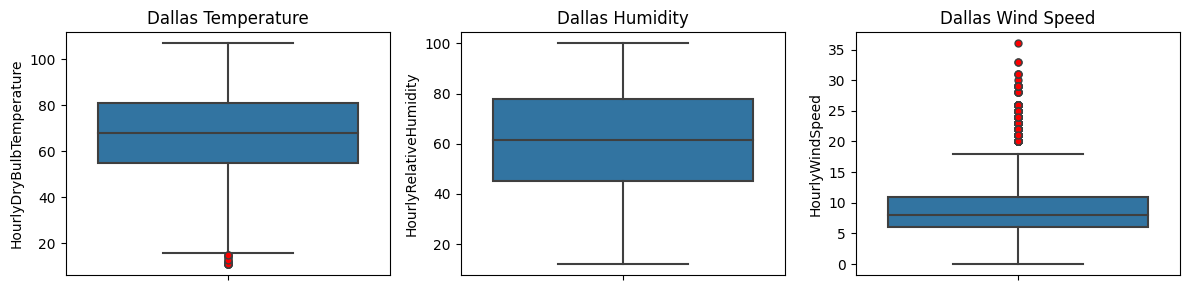

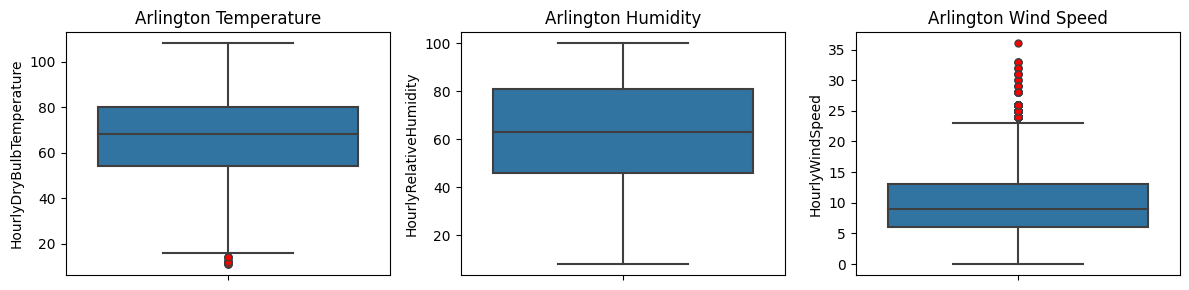

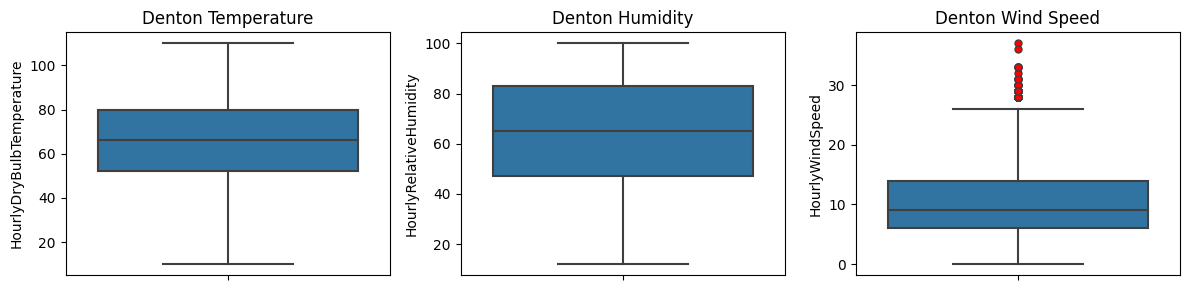

In [6]:
# Function to plot data
def plot_data(data, city_name):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    sns.boxplot(y=data['HourlyDryBulbTemperature'], showfliers=True, flierprops=dict(markerfacecolor='r', marker='o'))
    plt.title(f'{city_name} Temperature')

    plt.subplot(1, 3, 2)
    sns.boxplot(y=data['HourlyRelativeHumidity'], showfliers=True, flierprops=dict(markerfacecolor='r', marker='o'))
    plt.title(f'{city_name} Humidity')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=data['HourlyWindSpeed'], showfliers=True, flierprops=dict(markerfacecolor='r', marker='o'))
    plt.title(f'{city_name} Wind Speed')

    plt.tight_layout()
    plt.show()


# Plot for each city
plot_data(dallas, 'Dallas')
plot_data(arlington, 'Arlington')
plot_data(denton, 'Denton')



In [7]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Assuming dallas_data, arlington_data, denton_data are your dataframes
dallas = remove_outliers(dallas, 'HourlyDryBulbTemperature')
dallas = remove_outliers(dallas, 'HourlyWindSpeed')

arlington = remove_outliers(arlington, 'HourlyDryBulbTemperature')
arlington = remove_outliers(arlington, 'HourlyWindSpeed')

denton = remove_outliers(denton, 'HourlyDryBulbTemperature')
denton = remove_outliers(denton, 'HourlyWindSpeed')


**BOXPLOTS AFTER CLEANING**

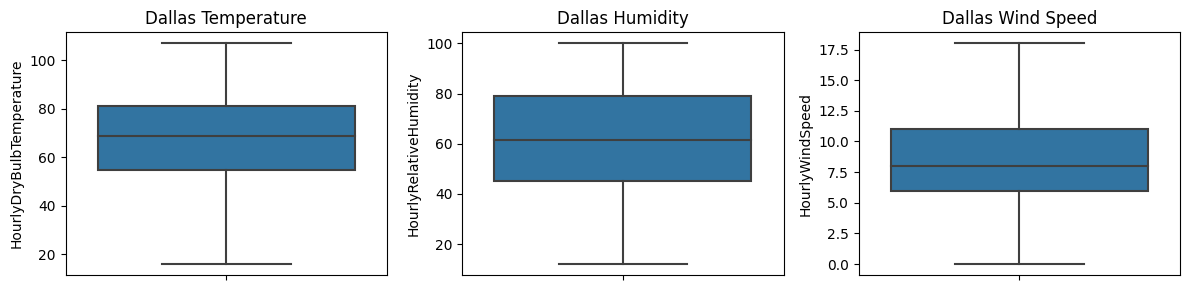

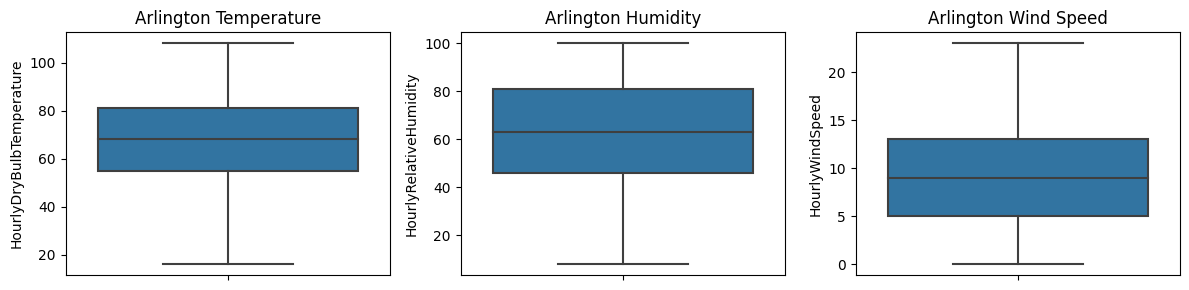

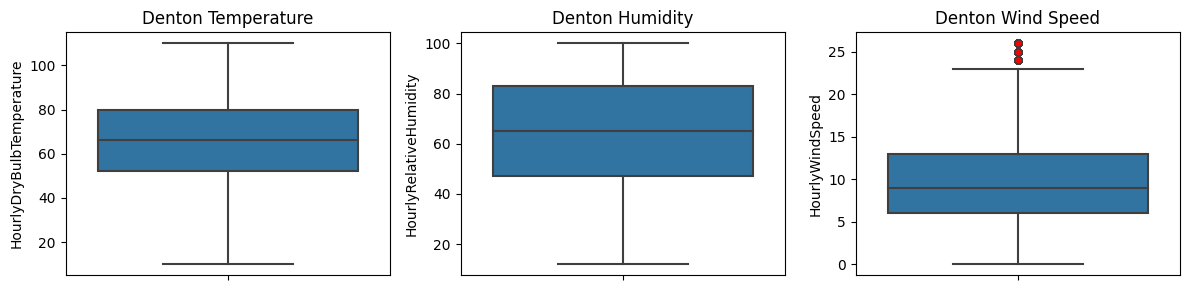

In [8]:
# Function to plot data
def plot_data(data, city_name):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    sns.boxplot(y=data['HourlyDryBulbTemperature'], showfliers=True, flierprops=dict(markerfacecolor='r', marker='o'))
    plt.title(f'{city_name} Temperature')

    plt.subplot(1, 3, 2)
    sns.boxplot(y=data['HourlyRelativeHumidity'], showfliers=True, flierprops=dict(markerfacecolor='r', marker='o'))
    plt.title(f'{city_name} Humidity')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=data['HourlyWindSpeed'], showfliers=True, flierprops=dict(markerfacecolor='r', marker='o'))
    plt.title(f'{city_name} Wind Speed')

    plt.tight_layout()
    plt.show()


# Plot for each city
plot_data(dallas, 'Dallas')
plot_data(arlington, 'Arlington')
plot_data(denton, 'Denton')


**3. Time Series Analysis:**

Plot time series graphs for key variables like temperature and humidity. This will help in understanding the temporal patterns and any noticeable trends over the year. We can look for seasonality or cyclic patterns, which are common in climatic data.


In [9]:
# Check the column names in Denton dataset
print("Denton Dataset Columns:", denton.columns)

# Check the column names in Dallas dataset
print("Dallas Dataset Columns:", dallas.columns)

# Check the column names in Arlington dataset
print("Arlington Dataset Columns:", arlington.columns)



Denton Dataset Columns: Index(['DATE', 'HourlyDryBulbTemperature', 'HourlyWetBulbTemperature',
       'HourlyDewPointTemperature', 'HourlyPrecipitation',
       'HourlySeaLevelPressure', 'HourlyStationPressure',
       'HourlyRelativeHumidity', 'HourlyWindSpeed', 'HourlyWindDirection',
       'Hour', 'Time', 'Date', 'DayOfWeek', 'Month', 'Season'],
      dtype='object')
Dallas Dataset Columns: Index(['DATE', 'HourlyDryBulbTemperature', 'HourlyWetBulbTemperature',
       'HourlyDewPointTemperature', 'HourlyPrecipitation',
       'HourlySeaLevelPressure', 'HourlyStationPressure',
       'HourlyRelativeHumidity', 'HourlyWindSpeed', 'HourlyWindDirection',
       'Hour', 'Time', 'Date', 'DayOfWeek', 'Month', 'Season'],
      dtype='object')
Arlington Dataset Columns: Index(['DATE', 'HourlyDryBulbTemperature', 'HourlyWetBulbTemperature',
       'HourlyDewPointTemperature', 'HourlyPrecipitation',
       'HourlySeaLevelPressure', 'HourlyStationPressure',
       'HourlyRelativeHumidity', 'Hourl

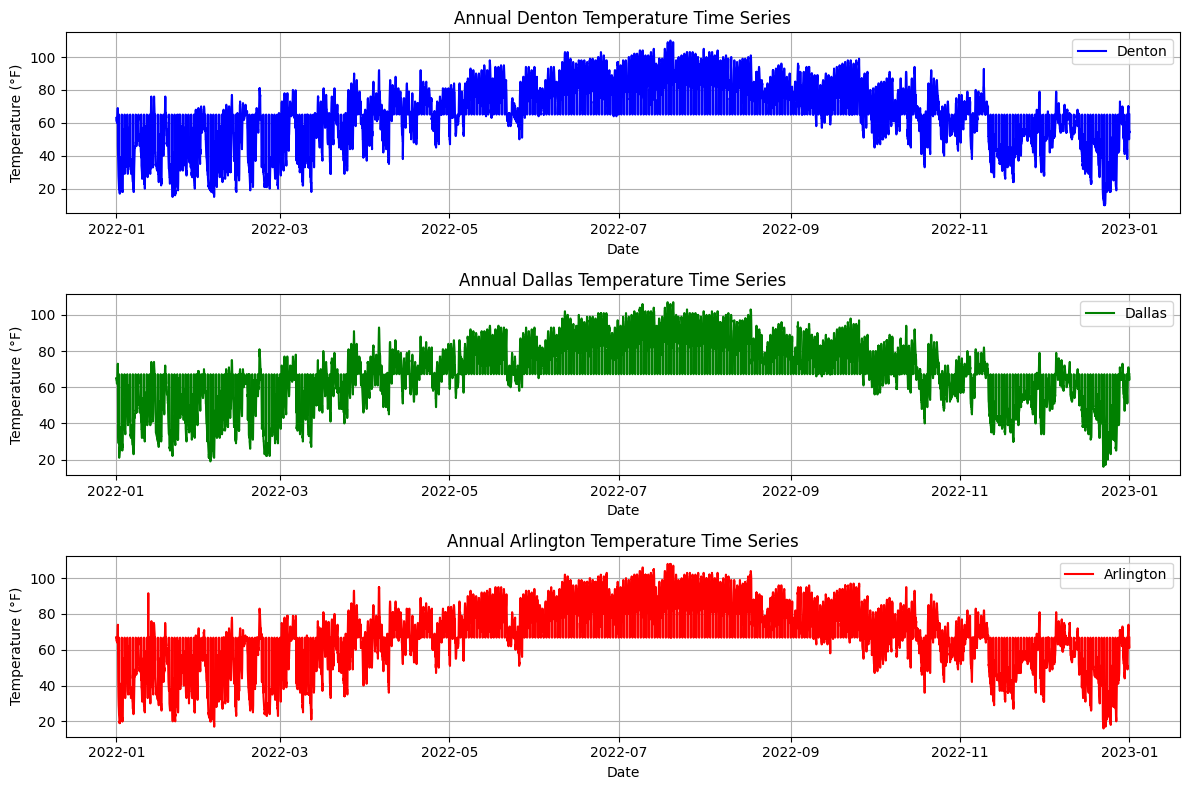

In [10]:
# Plotting the temperature time series

import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

# Plot Dallas
axes[1].plot(dallas['DATE'], dallas['HourlyDryBulbTemperature'], label='Dallas', color='green')
axes[1].set_title('Annual Dallas Temperature Time Series')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Temperature (°F)')
axes[1].legend()
axes[1].grid(True)

# Plot Arlington
axes[2].plot(arlington['DATE'], arlington['HourlyDryBulbTemperature'], label='Arlington', color='red')
axes[2].set_title('Annual Arlington Temperature Time Series')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Temperature (°F)')
axes[2].legend()
axes[2].grid(True)

# Plot Denton
axes[0].plot(denton['DATE'], denton['HourlyDryBulbTemperature'], label='Denton', color='blue')
axes[0].set_title('Annual Denton Temperature Time Series')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°F)')
axes[0].legend()
axes[0].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()

**4. Histograms and Distributions:**

Create histograms for different climatic variables to understand their distribution. Compare the distributions of these variables across the three cities to spot any significant differences.

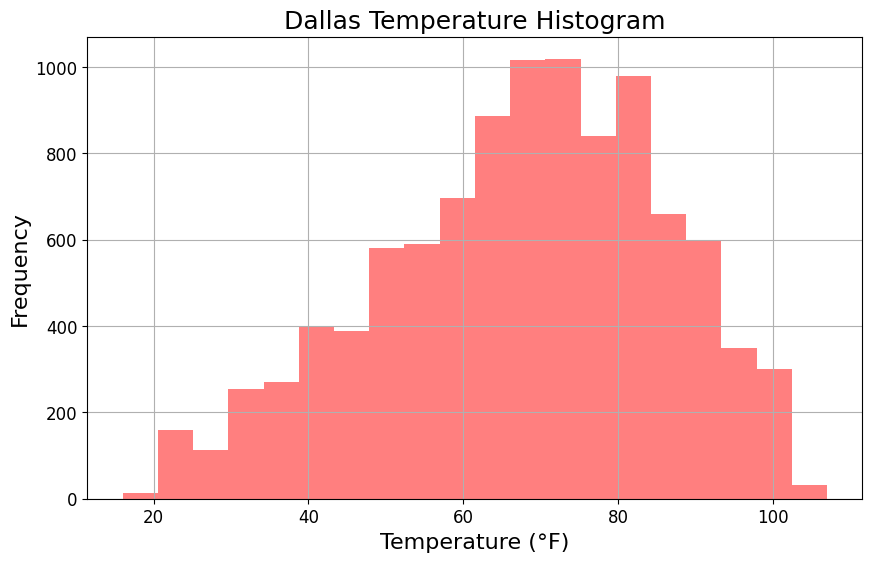

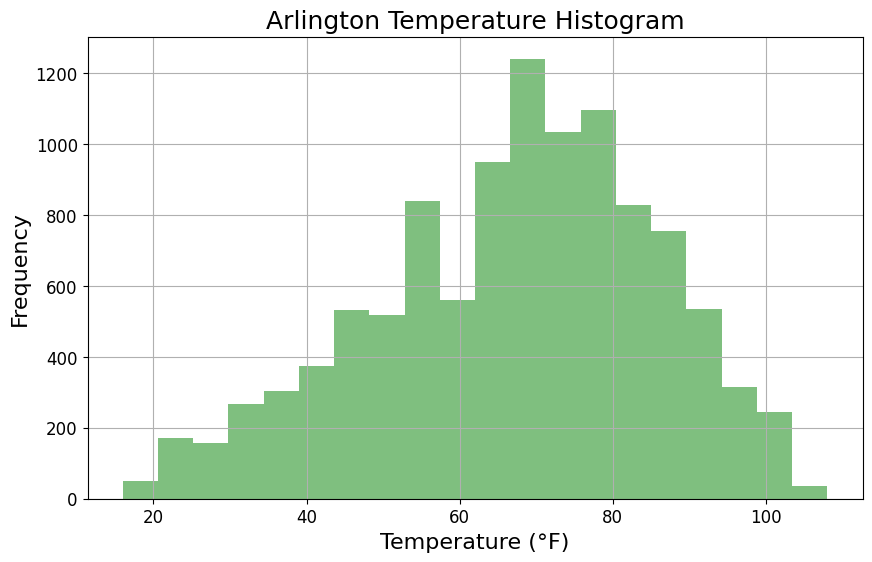

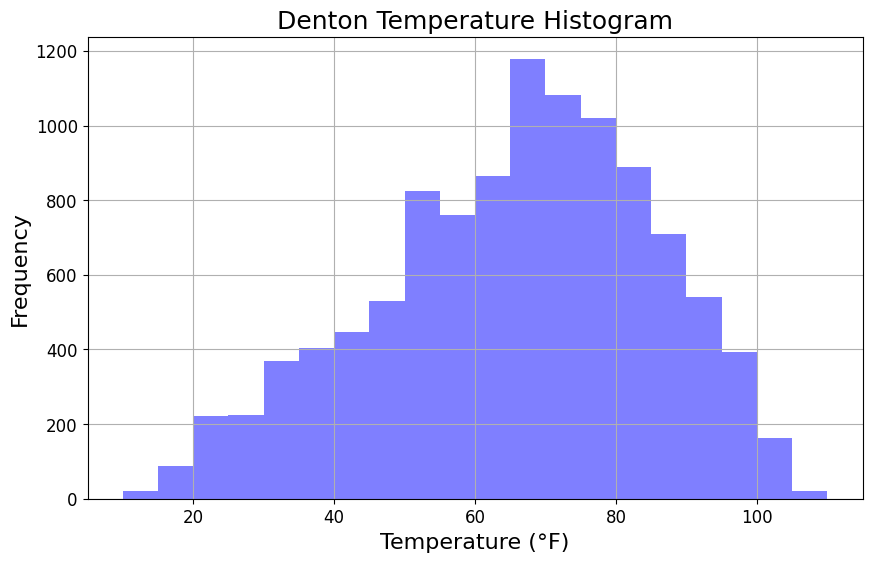

In [11]:
# Define font sizes
title_fontsize = 18
label_fontsize = 16
ticks_fontsize = 12

# Histogram for Dallas
plt.figure(figsize=(10, 6))
plt.hist(dallas['HourlyDryBulbTemperature'], bins=20, alpha=0.5, color='red')
plt.title('Dallas Temperature Histogram', fontsize=title_fontsize)
plt.xlabel('Temperature (°F)', fontsize=label_fontsize)
plt.ylabel('Frequency', fontsize=label_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
plt.grid(True)
plt.show()

# Histogram for Arlington
plt.figure(figsize=(10, 6))
plt.hist(arlington['HourlyDryBulbTemperature'], bins=20, alpha=0.5, color='green')
plt.title('Arlington Temperature Histogram', fontsize=title_fontsize)
plt.xlabel('Temperature (°F)', fontsize=label_fontsize)
plt.ylabel('Frequency', fontsize=label_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
plt.grid(True)
plt.show()

# Histogram for Denton
plt.figure(figsize=(10, 6))
plt.hist(denton['HourlyDryBulbTemperature'], bins=20, alpha=0.5, color='blue')
plt.title('Denton Temperature Histogram', fontsize=title_fontsize)
plt.xlabel('Temperature (°F)', fontsize=label_fontsize)
plt.ylabel('Frequency', fontsize=label_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
plt.grid(True)
plt.show()


In [12]:
skewness_dallas = dallas['HourlyDryBulbTemperature'].skew()
skewness_arlington = arlington['HourlyDryBulbTemperature'].skew()
skewness_denton = denton['HourlyDryBulbTemperature'].skew()


print(skewness_dallas)
print(skewness_arlington)
print(skewness_denton)

-0.36469398943711373
-0.37543469534486196
-0.3439428246977408


**5. Correlation Analysis:**

Conduct a correlation analysis to understand the relationships between different variables. Heatmaps can be particularly useful for visualizing correlation matrices.

**For Dallas:**

<ipython-input-13-511e4e705c2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_dallas = dallas.corr()


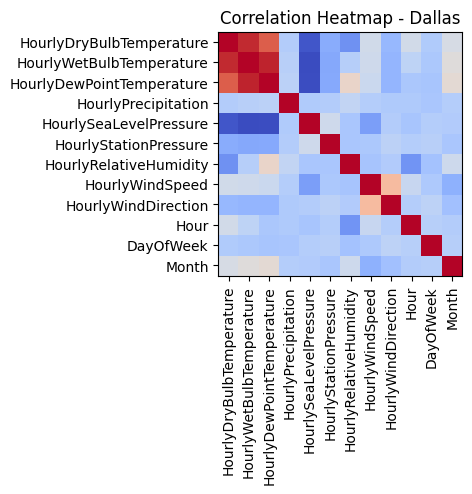

In [13]:
correlation_matrix_dallas = dallas.corr()

plt.figure(figsize=(10, 8))
plt.subplot(131)
plt.imshow(correlation_matrix_dallas, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Heatmap - Dallas')
plt.xticks(range(len(correlation_matrix_dallas)), correlation_matrix_dallas.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_dallas)), correlation_matrix_dallas.columns)

plt.tight_layout()
plt.show()

**For Denton:**

<ipython-input-14-5dd317c9a2de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_denton = denton.corr()


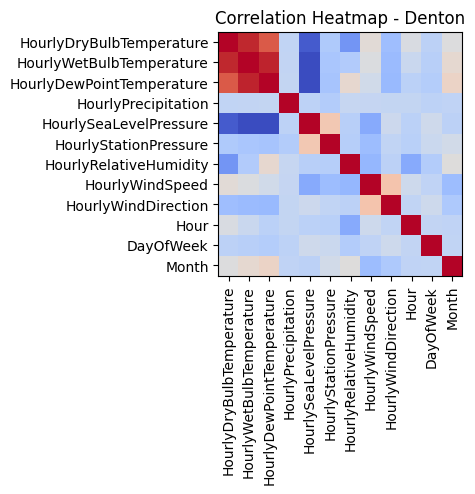

In [14]:
correlation_matrix_denton = denton.corr()

plt.figure(figsize=(10, 8))
plt.subplot(131)
plt.imshow(correlation_matrix_denton, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Heatmap - Denton')
plt.xticks(range(len(correlation_matrix_denton)), correlation_matrix_denton.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_denton)), correlation_matrix_denton.columns)

plt.tight_layout()
plt.show()

**For Arlington:**

<ipython-input-15-4d34bf5a1d15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_arlington = arlington.corr()


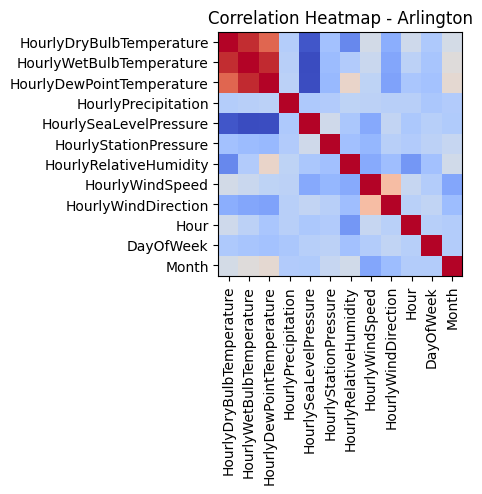

In [15]:
correlation_matrix_arlington = arlington.corr()

plt.figure(figsize=(10, 8))
plt.subplot(131)
plt.imshow(correlation_matrix_arlington, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Heatmap - Arlington')
plt.xticks(range(len(correlation_matrix_arlington)), correlation_matrix_arlington.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_arlington)), correlation_matrix_arlington.columns)

plt.tight_layout()
plt.show()

**6. Temperature difference based on different times of the day**

In [16]:
def categorize_day_night(hour):
    if 6 <= hour < 18:
        return 'Daytime'
    else:
        return 'Nighttime'

# Apply this function to your datasets
arlington['Day_Night'] = arlington['Hour'].apply(categorize_day_night)
dallas['Day_Night'] = dallas['Hour'].apply(categorize_day_night)
denton['Day_Night'] = denton['Hour'].apply(categorize_day_night)

# Calculate average temperatures
arlington_day_night_avg = arlington.groupby('Day_Night')['HourlyDryBulbTemperature'].mean()
dallas_day_night_avg = dallas.groupby('Day_Night')['HourlyDryBulbTemperature'].mean()
denton_day_night_avg = denton.groupby('Day_Night')['HourlyDryBulbTemperature'].mean()

# Display the average temperatures
print("Arlington - Day vs Night Avg Temperature:\n", arlington_day_night_avg)
print("Dallas - Day vs Night Avg Temperature:\n", dallas_day_night_avg)
print("Denton - Day vs Night Avg Temperature:\n", denton_day_night_avg)

Arlington - Day vs Night Avg Temperature:
 Day_Night
Daytime      70.480574
Nighttime    63.592148
Name: HourlyDryBulbTemperature, dtype: float64
Dallas - Day vs Night Avg Temperature:
 Day_Night
Daytime      70.213849
Nighttime    65.082392
Name: HourlyDryBulbTemperature, dtype: float64
Denton - Day vs Night Avg Temperature:
 Day_Night
Daytime      69.247135
Nighttime    61.047231
Name: HourlyDryBulbTemperature, dtype: float64


**Plot: Daytime vs Nighttime Average Temperatures Across Cities**

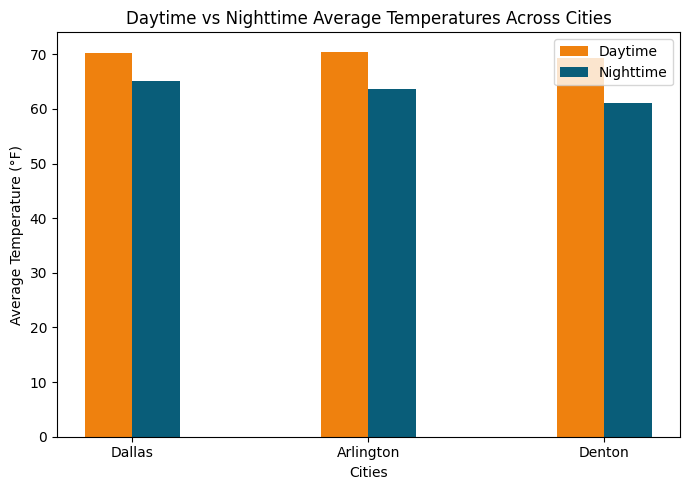

In [17]:
# Set up for multiple bar plot
bar_width = 0.2  # width of the bars
index = np.arange(3)  # Three cities

# Creating the plot
plt.figure(figsize=(7, 5))
plt.bar(index, [dallas_day_night_avg['Daytime'], arlington_day_night_avg['Daytime'],denton_day_night_avg['Daytime']],
        bar_width, color='#EF810E', label='Daytime')
plt.bar(index + bar_width, [dallas_day_night_avg['Nighttime'],arlington_day_night_avg['Nighttime'],  denton_day_night_avg['Nighttime']],
        bar_width, color='#095D79', label='Nighttime')

plt.xlabel('Cities')
plt.ylabel('Average Temperature (°F)')
plt.title('Daytime vs Nighttime Average Temperatures Across Cities')
plt.xticks(index + bar_width / 2, ['Dallas', 'Arlington', 'Denton'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

**Key Takeaways:**

*   The smaller difference in nighttime and daytime temperatures in Dallas aligns with a stronger UHI effect, where the urban environment retains more heat.
*   Arlington, while also urban, shows a slightly more significant temperature drop at night than Dallas, indicating a somewhat less intense UHI effect.

*  Denton’s larger temperature drop is consistent with rural areas that do not exhibit strong UHI effects.

**7. Temporal Comparison:**

To compare the same time periods (like months or seasons) across the three cities, you can follow these steps:

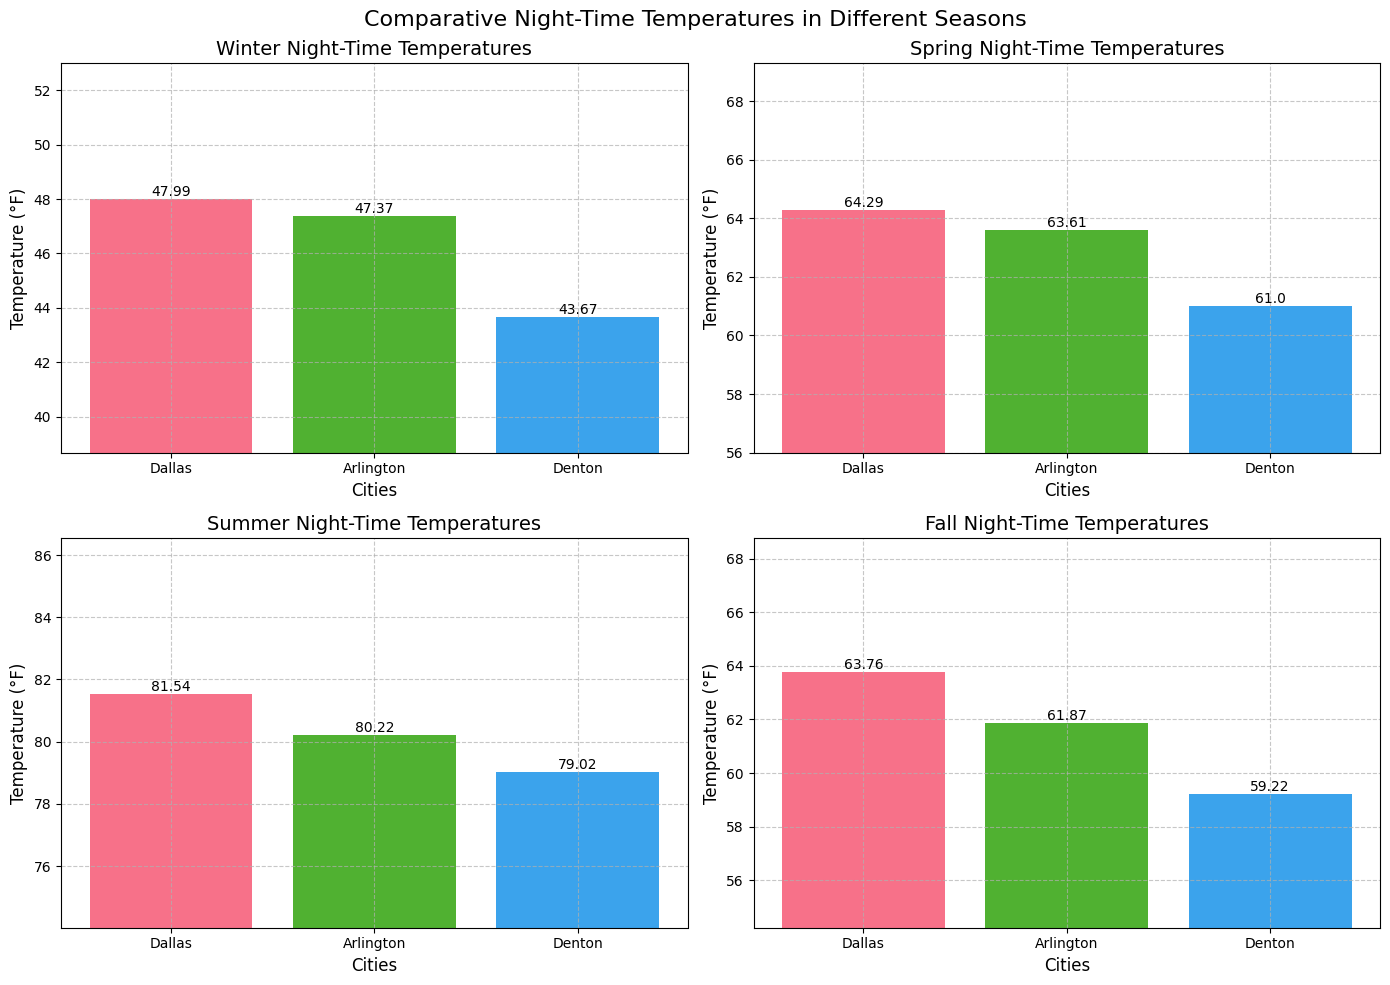

In [18]:
# Define night-time hours (9 PM to 3 AM)
night_hours = [21, 22, 23, 0, 1, 2, 3]

# Define seasons
winter_months = [12, 1, 2]
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]

# Function to calculate average night-time temperature
def calculate_nighttime_avg(df, months):
    nighttime_data = df[df['DATE'].dt.month.isin(months) & df['Hour'].isin(night_hours)]
    return nighttime_data['HourlyDryBulbTemperature'].mean()

# Calculate average night-time temperatures for each city and season
nighttime_temps_seasons = {}
for season, months in zip(['Winter', 'Spring', 'Summer', 'Fall'], [winter_months, spring_months, summer_months, fall_months]):
    nighttime_temps_seasons[season] = {
        'Denton': calculate_nighttime_avg(denton, months),
        'Dallas': calculate_nighttime_avg(dallas, months),
        'Arlington': calculate_nighttime_avg(arlington, months)
    }

# Define a more visually appealing color palette
colors = sns.color_palette('husl', 3)

# Visualize the results with values on each bar
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
cities = ['Dallas', 'Arlington', 'Denton']

plt.figure(figsize=(14, 10))

for i, season in enumerate(seasons):
    avg_temps = [nighttime_temps_seasons[season][city] for city in cities]

    ax = plt.subplot(2, 2, i+1)

    # Creating bars with different colors
    bars = ax.bar(cities, avg_temps, color=colors)

    # Annotate each bar with the value
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
                ha='center', va='bottom', fontsize=10, color='black')

    # Enhancing the subplot
    ax.set_title(f'{season} Night-Time Temperatures', fontsize=14)
    ax.set_xlabel('Cities', fontsize=12)
    ax.set_ylabel('Temperature (°F)', fontsize=12)
    ax.set_ylim(min(avg_temps) - 5, max(avg_temps) + 5)  # Adjust y-axis
    ax.grid(True, linestyle='--', alpha=0.7)  # Adding grid lines

plt.suptitle('Comparative Night-Time Temperatures in Different Seasons', fontsize=16)
plt.tight_layout()
plt.show()

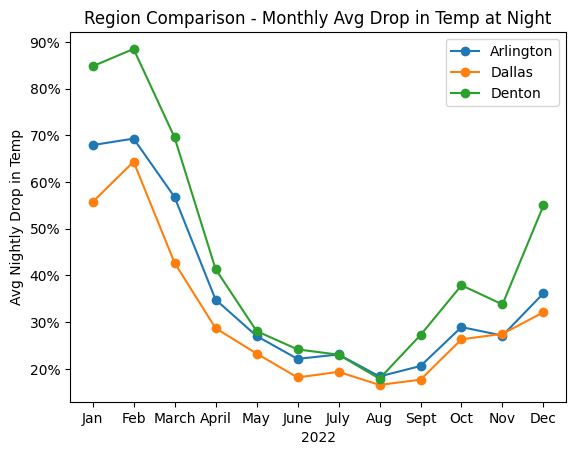

In [19]:
# Plot for "Region Comparison - Monthly Avg Drop in Temp at Night"

# Remove midnight "23:59:00" and only look at "nighttime" values for all 3 regions
plot_arlington = arlington[(arlington['Time'] != '23:59:00') & (arlington['Day_Night'] == 'Nighttime')].copy()
plot_dallas = dallas[(dallas['Time'] != '23:59:00') & (dallas['Day_Night'] == 'Nighttime')].copy()
plot_denton = denton[(denton['Time'] != '23:59:00') & (denton['Day_Night'] == 'Nighttime')].copy()

# Calculate "nightly rate of change" (high vs. low temps) for Arlington
plot_arlington['low'] = plot_arlington.groupby('Date')['HourlyDryBulbTemperature'].transform('min')
plot_arlington['high'] = plot_arlington.groupby('Date')['HourlyDryBulbTemperature'].transform('max')
plot_arlington['rate_of_change'] = (plot_arlington['high'] - plot_arlington['low']) / plot_arlington['low'] * 100

# Calculate "average monthly temperature rate of change" for Arlington
avg_rate_of_change_by_date = plot_arlington.groupby('Date')['rate_of_change'].mean().reset_index()
avg_rate_of_change_by_date['Date'] = pd.to_datetime(avg_rate_of_change_by_date['Date'])
avg_rate_of_change_by_date['Month'] = avg_rate_of_change_by_date['Date'].dt.month
avg_rate_of_change_by_month_arlington = avg_rate_of_change_by_date.groupby('Month')['rate_of_change'].mean().reset_index()

# Calculate "nightly rate of change" (high vs. low temps) for Dallas
plot_dallas['low'] = plot_dallas.groupby('Date')['HourlyDryBulbTemperature'].transform('min')
plot_dallas['high'] = plot_dallas.groupby('Date')['HourlyDryBulbTemperature'].transform('max')
plot_dallas['rate_of_change'] = (plot_dallas['high'] - plot_dallas['low']) / plot_dallas['low'] * 100

# Calculate "average monthly temperature rate of change" for Dallas
avg_rate_of_change_by_date = plot_dallas.groupby('Date')['rate_of_change'].mean().reset_index()
avg_rate_of_change_by_date['Date'] = pd.to_datetime(avg_rate_of_change_by_date['Date'])
avg_rate_of_change_by_date['Month'] = avg_rate_of_change_by_date['Date'].dt.month
avg_rate_of_change_by_month_dallas = avg_rate_of_change_by_date.groupby('Month')['rate_of_change'].mean().reset_index()

# Calculate "nightly rate of change" (high vs. low temps) for Denton
plot_denton['low'] = plot_denton.groupby('Date')['HourlyDryBulbTemperature'].transform('min')
plot_denton['high'] = plot_denton.groupby('Date')['HourlyDryBulbTemperature'].transform('max')
plot_denton['rate_of_change'] = (plot_denton['high'] - plot_denton['low']) / plot_denton['low'] * 100

# Calculate "nightly rate of change" (high vs. low temps) for Denton
avg_rate_of_change_by_date = plot_denton.groupby('Date')['rate_of_change'].mean().reset_index()
avg_rate_of_change_by_date['Date'] = pd.to_datetime(avg_rate_of_change_by_date['Date'])
avg_rate_of_change_by_date['Month'] = avg_rate_of_change_by_date['Date'].dt.month
avg_rate_of_change_by_month_denton = avg_rate_of_change_by_date.groupby('Month')['rate_of_change'].mean().reset_index()

# Plot the data
plt.plot(avg_rate_of_change_by_month_arlington['Month'], avg_rate_of_change_by_month_arlington['rate_of_change'], label='Arlington', marker='o')
plt.plot(avg_rate_of_change_by_month_dallas['Month'], avg_rate_of_change_by_month_dallas['rate_of_change'], label='Dallas', marker='o')
plt.plot(avg_rate_of_change_by_month_denton['Month'], avg_rate_of_change_by_month_denton['rate_of_change'], label='Denton', marker='o')

# Change x-axis from "numbers of months" to "names of months"
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(avg_rate_of_change_by_month_arlington['Month'], months)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Labels for plot
plt.xlabel('2022')
plt.ylabel('Avg Nightly Drop in Temp')
plt.title('Region Comparison - Monthly Avg Drop in Temp at Night')
plt.grid(False)
plt.legend()
plt.show()

**Seasonal Variation of Relative Humidity in Different Cities**

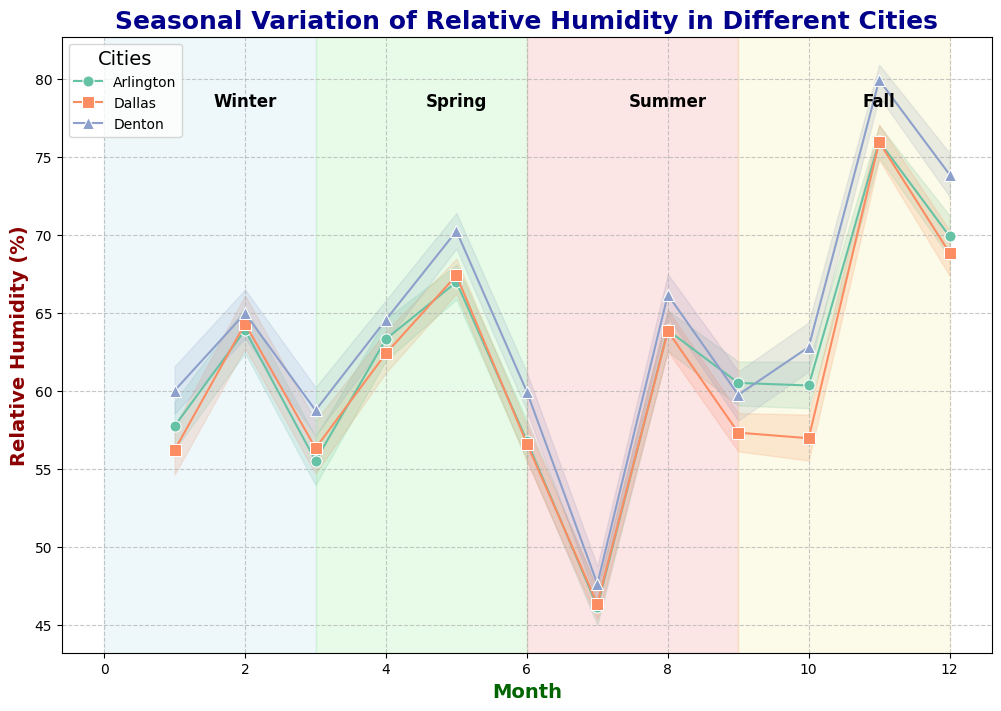

In [20]:
custom_palette = sns.color_palette("Set2", n_colors=3)

# Set up the plot
plt.figure(figsize=(12, 8))

# Plotting with a line style and markers
sns.lineplot(x=pd.to_datetime(arlington['DATE']).dt.month, y=arlington['HourlyRelativeHumidity'], label='Arlington', color=custom_palette[0], linestyle='-', marker='o', markersize=8)
sns.lineplot(x=pd.to_datetime(dallas['DATE']).dt.month, y=dallas['HourlyRelativeHumidity'], label='Dallas', color=custom_palette[1], linestyle='-', marker='s', markersize=8)
sns.lineplot(x=pd.to_datetime(denton['DATE']).dt.month, y=denton['HourlyRelativeHumidity'], label='Denton', color=custom_palette[2], linestyle='-', marker='^', markersize=8)

# Customize the title and labels
plt.title('Seasonal Variation of Relative Humidity in Different Cities', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Relative Humidity (%)', fontsize=14, fontweight='bold', color='darkred')

# Customize the legend
plt.legend(title='Cities', title_fontsize='14')

# Enhance grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add background colors to highlight seasons with different colors
seasons = [(1, 'Winter', 'lightblue'), (4, 'Spring', 'lightgreen'), (7, 'Summer', 'lightcoral'), (10, 'Fall', 'khaki')]
for month, season_name, color in seasons:
    plt.axvspan(month - 1, month + 2, alpha=0.2, color=color, label=season_name)
    plt.text(month + 1, plt.ylim()[1] * 0.95, season_name, fontsize=12, ha='center', va='center', color='black', fontweight='bold')

# Show the plot
plt.show()

**8. Feature Engineering:**

In [21]:
# Calculate statistics for each season for DALLAS
seasonal_dallas = dallas.groupby('Season')['HourlyDryBulbTemperature'].describe()
seasonal_dallas

# Calculate statistics for each season for ARLINGTON
seasonal_arlington = arlington.groupby('Season')['HourlyDryBulbTemperature'].describe()
seasonal_arlington

# Calculate statistics for each season for DENTON
seasonal_denton = denton.groupby('Season')['HourlyDryBulbTemperature'].describe()
seasonal_denton

# Calculate the 25th, 50th, and 75th quartiles for each season for Dallas
dallas_temp = dallas.groupby('Season')['HourlyDryBulbTemperature'].quantile([0.75, 0.50, 0.25]).unstack()
dallas_humidity = dallas.groupby('Season')['HourlyRelativeHumidity'].quantile([0.25, 0.50, 0.75]).unstack()
dallas_wind_speed = dallas.groupby('Season')['HourlyWindSpeed'].quantile([0.25, 0.50, 0.75]).unstack()

# Display the thresholds
print(dallas_temp)
print(dallas_humidity)
print(dallas_wind_speed)

        0.25  0.50  0.75
Season                  
Fall    56.0  69.0  78.0
Spring  61.0  69.0  77.0
Summer  80.0  86.0  94.0
Winter  37.0  50.0  61.0
        0.25  0.50  0.75
Season                  
Fall    47.0  63.0  83.0
Spring  48.0  64.0  78.0
Summer  40.0  55.0  67.0
Winter  44.0  63.0  84.0
        0.25  0.50  0.75
Season                  
Fall     5.0   7.0   9.0
Spring   7.0  10.0  14.0
Summer   6.0   8.0  10.0
Winter   5.0   8.0  10.0


In [22]:
# Calculate the 25th, 50th, and 75th quartiles for each season for Arlington
ar_temp = arlington.groupby('Season')['HourlyDryBulbTemperature'].quantile([0.75, 0.50, 0.25]).unstack()
ar_humidity = arlington.groupby('Season')['HourlyRelativeHumidity'].quantile([0.75, 0.50, 0.25]).unstack()
ar_wind_speed = arlington.groupby('Season')['HourlyWindSpeed'].quantile([0.75, 0.50, 0.25]).unstack()

# Display the thresholds
print(ar_temp)
print(ar_humidity)
print(ar_wind_speed)

        0.25       0.50  0.75
Season                       
Fall    55.0  66.779507  76.0
Spring  61.0  70.000000  77.0
Summer  79.0  85.000000  93.0
Winter  36.0  50.000000  62.0
         0.25  0.50  0.75
Season                   
Fall    50.00  70.0  86.0
Spring  48.00  64.0  79.0
Summer  40.00  56.5  71.0
Winter  46.75  67.0  85.0
        0.25  0.50  0.75
Season                  
Fall     3.0   7.0  10.0
Spring   7.0  11.0  16.0
Summer   6.0   8.0  10.6
Winter   5.0   8.0  13.0


In [23]:
# Calculate the 25th, 50th, and 75th quartiles for each season for Denton
denton_temp = denton.groupby('Season')['HourlyDryBulbTemperature'].quantile([0.75, 0.50, 0.25]).unstack()
denton_humidity = denton.groupby('Season')['HourlyRelativeHumidity'].quantile([0.75, 0.50, 0.25]).unstack()
denton_wind_speed = denton.groupby('Season')['HourlyWindSpeed'].quantile([0.75, 0.50, 0.25]).unstack()

# Display the thresholds
print(denton_temp)
print(denton_humidity)
print(denton_wind_speed)

        0.25       0.50  0.75
Season                       
Fall    53.0  65.041063  75.0
Spring  58.0  67.000000  76.0
Summer  78.0  85.000000  93.0
Winter  32.0  47.000000  58.0
         0.25  0.50  0.75
Season                   
Fall    51.00  72.0  90.0
Spring  50.25  67.0  81.0
Summer  41.00  58.0  74.0
Winter  50.00  70.0  86.0
        0.25  0.50  0.75
Season                  
Fall     5.0   8.0  10.0
Spring   7.0  11.0  17.0
Summer   6.0   8.0  11.0
Winter   5.0   8.0  13.0


**UHI Intensity calculation**

In [24]:
def classify_uhi(row, temp_thresholds, humidity_thresholds, wind_speed_thresholds):
    season = row['Season']
    temp = row['HourlyDryBulbTemperature']
    humidity = row['HourlyRelativeHumidity']
    wind_speed = row['HourlyWindSpeed']

    # Get the thresholds for the current season
    temp_high = temp_thresholds.loc[season, 0.50] # previous threshold --> temp_high = temp_thresholds.loc[season, 0.75]
    temp_medium = temp_thresholds.loc[season, 0.25] # previous threshold --> temp_medium = temp_thresholds.loc[season, 0.50]
    humidity_low = humidity_thresholds.loc[season, 0.25]
    wind_speed_low = wind_speed_thresholds.loc[season, 0.25]

    # Classify based on combined criteria
    if temp > temp_high and humidity < humidity_low and wind_speed < wind_speed_low:
        return 'High'
    elif temp > temp_medium:
        return 'Medium'
    else:
        return 'Low'

In [25]:
# Apply the function
dallas['UHI Intensity'] = dallas.apply(lambda row: classify_uhi(row, dallas_temp, dallas_humidity, dallas_wind_speed), axis=1)
arlington['UHI Intensity'] = arlington.apply(lambda row: classify_uhi(row, ar_temp, ar_humidity, ar_wind_speed), axis=1)
denton['UHI Intensity'] = denton.apply(lambda row: classify_uhi(row, denton_temp, denton_humidity, denton_wind_speed), axis=1)

# for Dallas
print('UHI Intensity for Dallas:', dallas['UHI Intensity'].value_counts())


# for Arlington
print('UHI Intensity for Arlington:', arlington['UHI Intensity'].value_counts())


# for Denton
print('UHI Intensity for Denton:',denton['UHI Intensity'].value_counts())


UHI Intensity for Dallas: Medium    7271
Low       2626
High       245
Name: UHI Intensity, dtype: int64
UHI Intensity for Arlington: Medium    7846
Low       2804
High       155
Name: UHI Intensity, dtype: int64
UHI Intensity for Denton: Medium    7718
Low       2843
High       190
Name: UHI Intensity, dtype: int64


**HIGH UHI Intensity city---DALLAS**

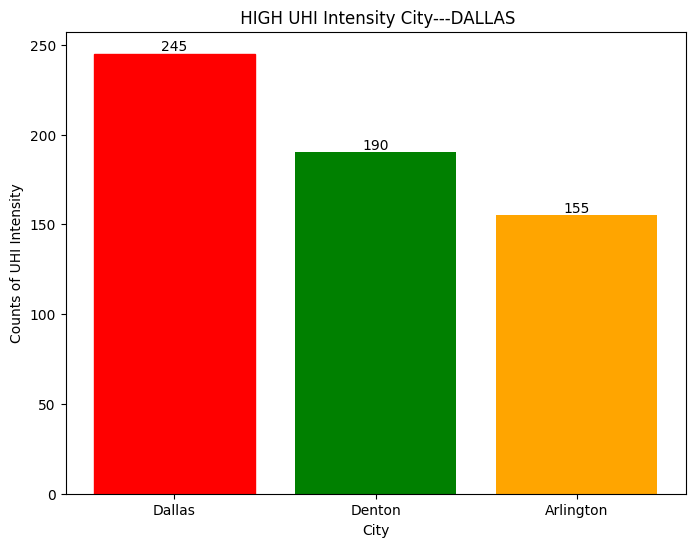

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data to mimic the UHI Intensity count output
# This would normally come from the 'value_counts()' of the actual dataframe
uhi_intensity_counts = {
    'City': ['Dallas','Denton' ,'Arlington'],
    'High': [245, 190, 155],  # Example counts of High UHI Intensity
    #'Medium': [7271, 7718, 7846],
    #'Low': [2626, 2843, 2804]
}

# Creating a DataFrame from the sample data
df_uhi = pd.DataFrame(uhi_intensity_counts)

# Melting the DataFrame to have 'Intensity' and 'Count' as separate columns
df_uhi_melted = df_uhi.melt(id_vars='City', var_name='Intensity', value_name='Count')

# Filtering for 'High' Intensity only to show the comparison
df_high_intensity = df_uhi_melted[df_uhi_melted['Intensity'] == 'High']

# Plotting the 'High' UHI Intensity counts for each city
plt.figure(figsize=(8, 6))
barplot = plt.bar(df_high_intensity['City'], df_high_intensity['Count'], color=['blue', 'green', 'orange'])
plt.title(' HIGH UHI Intensity City---DALLAS')
plt.xlabel('City')
plt.ylabel('Counts of UHI Intensity')

# Highlight Dallas with a different color
barplot[0].set_color('Red')  # Assuming Dallas is the first bar

# Annotate values on top of bars
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


**MEDIUM UHI Intensity City---ARLINGTON**

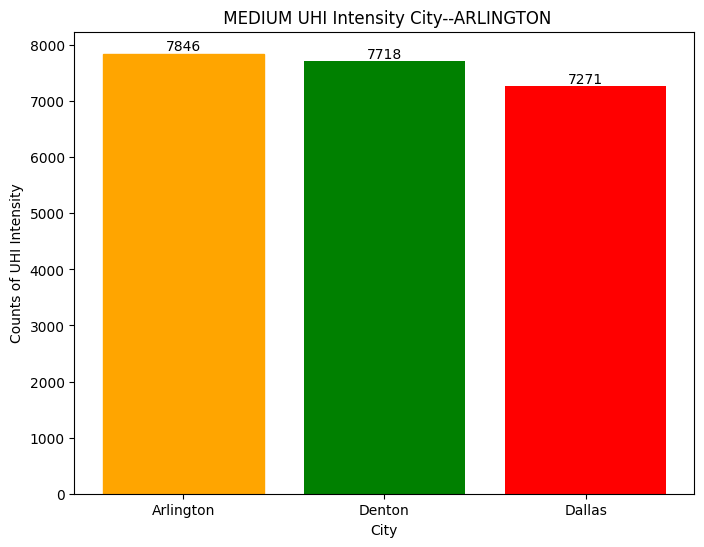

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data to mimic the UHI Intensity count output
# This would normally come from the 'value_counts()' of the actual dataframe
uhi_intensity_counts = {
    'City': ['Arlington','Denton','Dallas'],
    #'High': [245, 190, 155],  # Example counts of High UHI Intensity
    'Medium': [7846,7718,7271],
    #'Low': [2626, 2843, 2804]
}

# Creating a DataFrame from the sample data
df_uhi = pd.DataFrame(uhi_intensity_counts)

# Melting the DataFrame to have 'Intensity' and 'Count' as separate columns
df_uhi_melted = df_uhi.melt(id_vars='City', var_name='Intensity', value_name='Count')

# Filtering for 'Medium' Intensity only to show the comparison
df_medium_intensity = df_uhi_melted[df_uhi_melted['Intensity'] == 'Medium']

# Plotting the 'Medium' UHI Intensity counts for each city
plt.figure(figsize=(8, 6))
barplot = plt.bar(df_medium_intensity['City'], df_medium_intensity['Count'], color=['blue', 'green', 'red'])
plt.title(' MEDIUM UHI Intensity City--ARLINGTON')
plt.xlabel('City')
plt.ylabel('Counts of UHI Intensity')

# Highlight Arlington with a different color
barplot[0].set_color('orange')


# Annotate values on top of bars
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

**LOW UHI Intensity by City---DENTON**

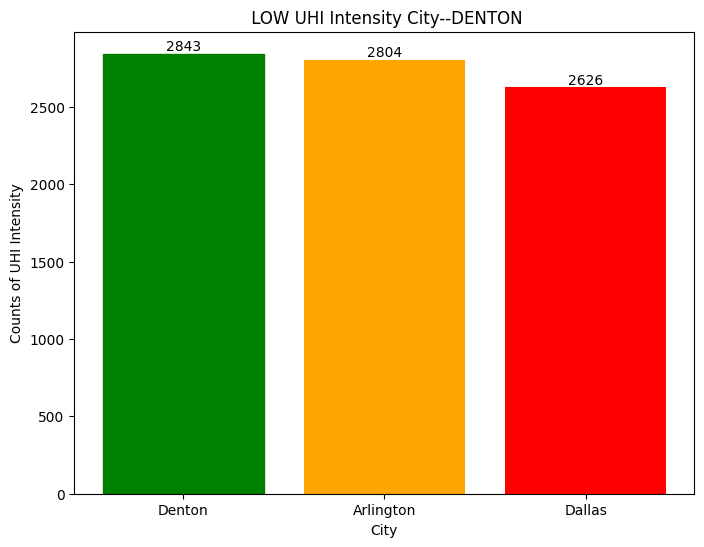

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data to mimic the UHI Intensity count output
# This would normally come from the 'value_counts()' of the actual dataframe
uhi_intensity_counts = {
    'City': ['Denton','Arlington','Dallas'],
    #'High': [245, 190, 155],
    #'Medium': [7846,7718,7271],
    'Low': [2843, 2804, 2626]
}

# Creating a DataFrame from the sample data
df_uhi = pd.DataFrame(uhi_intensity_counts)

# Melting the DataFrame to have 'Intensity' and 'Count' as separate columns
df_uhi_melted = df_uhi.melt(id_vars='City', var_name='Intensity', value_name='Count')

# Filtering for 'Low' Intensity only to show the comparison
df_low_intensity = df_uhi_melted[df_uhi_melted['Intensity'] == 'Low']

# Plotting the 'Low' UHI Intensity counts for each city
plt.figure(figsize=(8, 6))
barplot = plt.bar(df_low_intensity['City'], df_low_intensity['Count'], color=['blue', 'orange', 'red'])
plt.title(' LOW UHI Intensity City--DENTON')
plt.xlabel('City')
plt.ylabel('Counts of UHI Intensity')

# Highlight Denton with a different color
barplot[0].set_color('green')


# Annotate values on top of bars
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

# **5. Model Development**

1. Model selection

2. Model Training and Validation

3. Model Evaluation





In [29]:
# Combining datasets
combined_data = pd.concat([dallas, arlington, denton])

combined_data = pd.get_dummies(combined_data, columns=['Season'])
features = ['HourlyDryBulbTemperature','HourlyWetBulbTemperature','HourlyRelativeHumidity','HourlyDewPointTemperature','HourlyPrecipitation','HourlySeaLevelPressure','HourlyStationPressure','HourlyWindSpeed','HourlyWindDirection']


X = combined_data[features]  # Features
y = combined_data['UHI Intensity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LabelEncoder
encoder= LabelEncoder()

# Fit and transform the labels in the training and testing sets
y_train_new = encoder.fit_transform(y_train)
y_test_new = encoder.transform(y_test)

**Model 1: Decision Tree Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00       200
         Low       0.72      0.69      0.70      2450
      Medium       0.87      0.90      0.89      6860

    accuracy                           0.83      9510
   macro avg       0.53      0.53      0.53      9510
weighted avg       0.81      0.83      0.82      9510



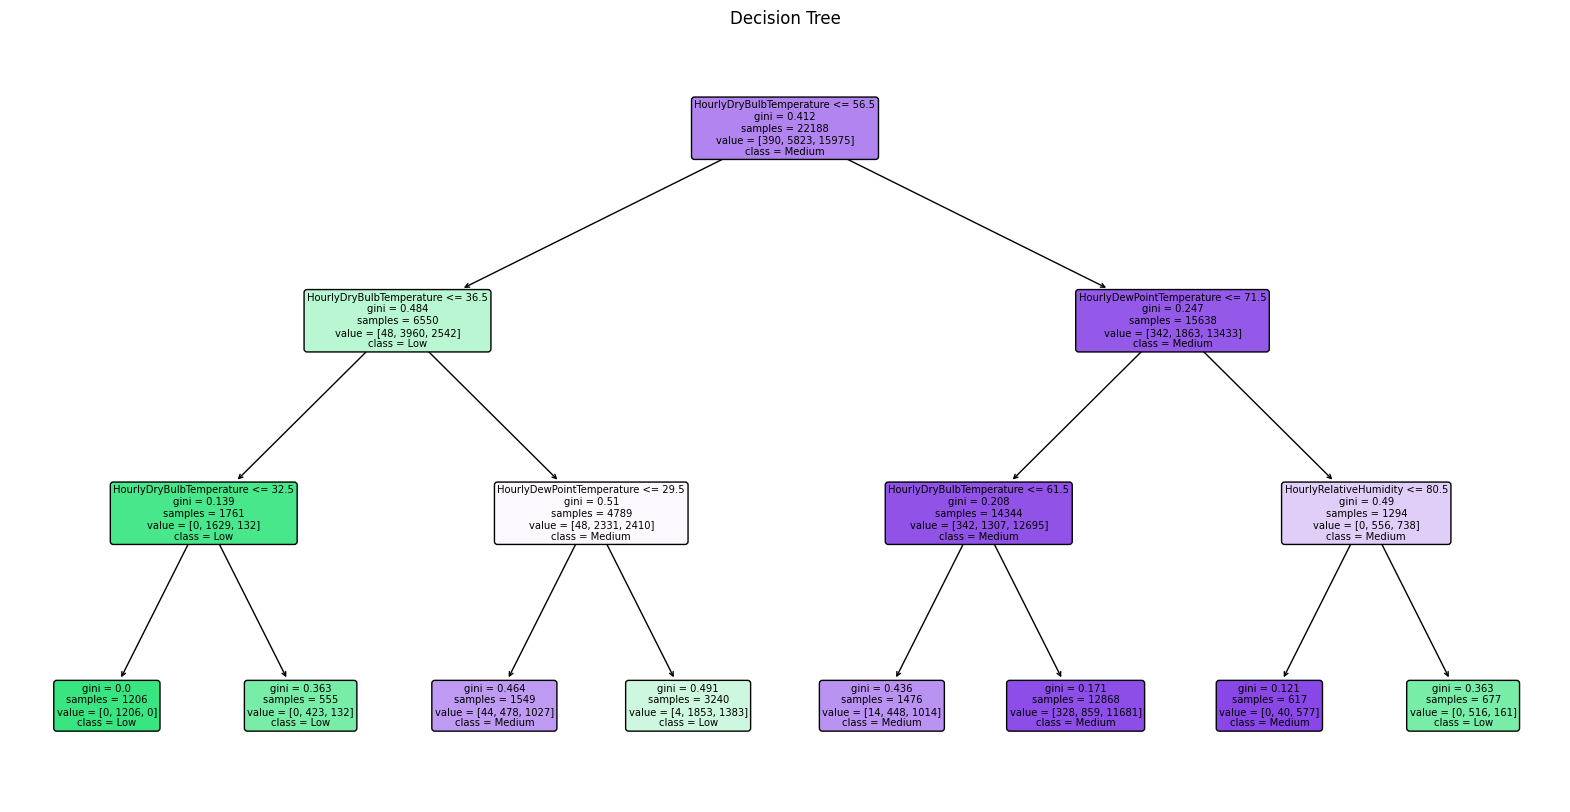

In [30]:
# Fit the model
dt_model =DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

# Prediction and Evaluation
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True)
plt.title('Decision Tree')
plt.show()

**Model 2: XGBoost Classifier**

In [31]:
# Using encoded labels to train the model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_new)

# Prediction and Evaluation
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test_new, xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       200
           1       0.83      0.77      0.80      2450
           2       0.92      0.94      0.93      6860

    accuracy                           0.90      9510
   macro avg       0.86      0.84      0.85      9510
weighted avg       0.89      0.90      0.90      9510



**Model 3: Gradient Boost Classifier**

In [32]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train_new)

# Prediction and Evaluation
gb_pred = gb_model.predict(X_test)
print(classification_report(y_test_new, gb_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       200
           1       0.79      0.68      0.73      2450
           2       0.89      0.93      0.91      6860

    accuracy                           0.86      9510
   macro avg       0.82      0.78      0.80      9510
weighted avg       0.86      0.86      0.86      9510



**Model 4: SVM Classifier**

In [33]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

# Prediction and Evaluation
svm_pred= svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00       200
         Low       0.82      0.41      0.55      2450
      Medium       0.80      0.97      0.88      6860

    accuracy                           0.80      9510
   macro avg       0.54      0.46      0.48      9510
weighted avg       0.79      0.80      0.77      9510



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model 5: Random Forest Classifier**

In [34]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)


**Classification report:**

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.82      0.74      0.78       200
         Low       0.84      0.79      0.81      2450
      Medium       0.92      0.94      0.93      6860

    accuracy                           0.90      9510
   macro avg       0.86      0.83      0.84      9510
weighted avg       0.90      0.90      0.90      9510



**Confusion Matrix for Random Forest Classifier**

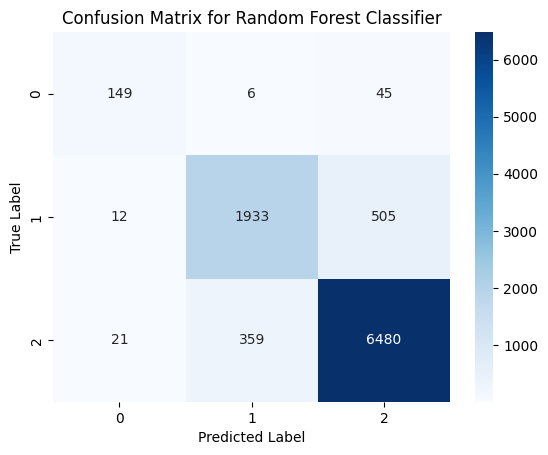

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For example, using Random Forest Classifier results
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Feature Importance from Random Forest**

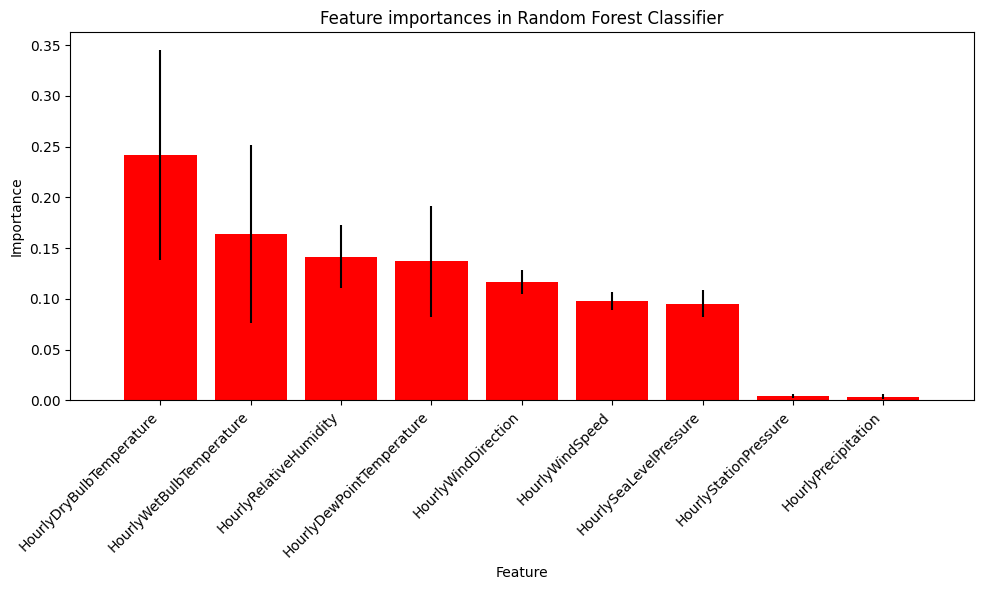

In [37]:
importances = rfc_model.feature_importances_
feature_names = X_train.columns
std = np.std([tree.feature_importances_ for tree in rfc_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_names = [feature_names[i] for i in indices]

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature importances in Random Forest Classifier")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_names, rotation=45, ha='right')
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

**ROC and AUC curve**

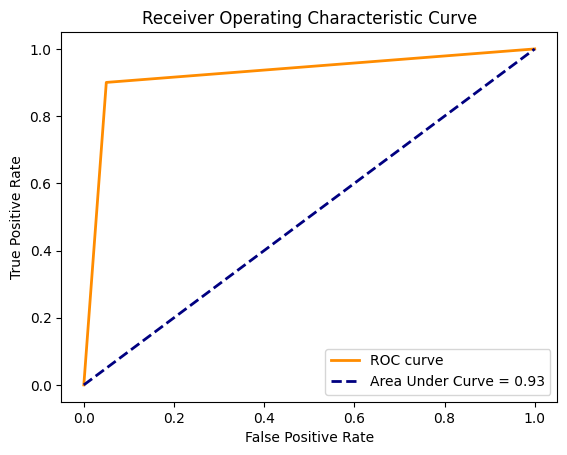

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label=f'Area Under Curve = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
 #An AUC of 0.93 suggests that the classifier is performing very well

**Precision-Recall Curve**

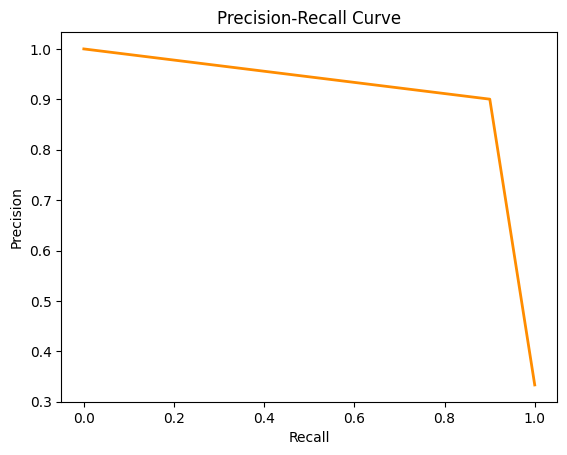

In [40]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## 6. **Model Comparison Bar Chart**

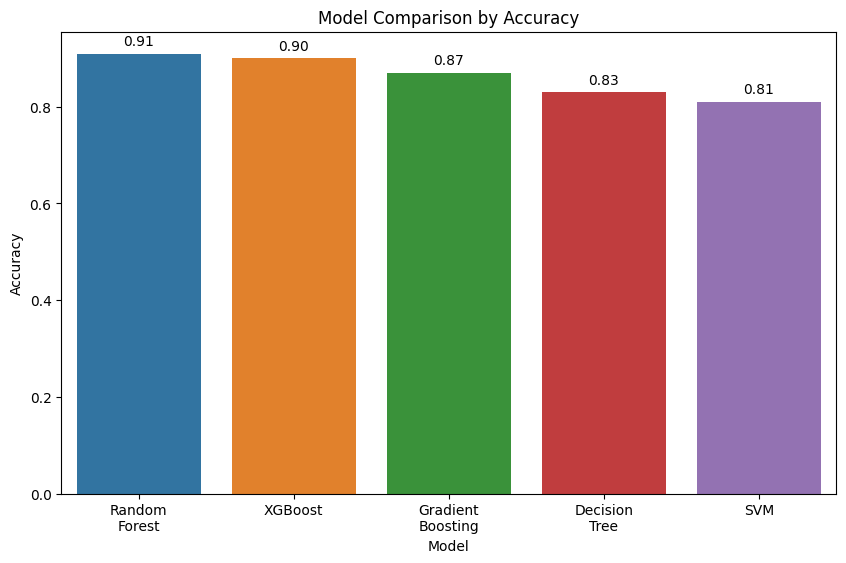

In [41]:
model_performance = {
    'Model': [ 'Random\nForest', 'XGBoost','Gradient\nBoosting', 'Decision\nTree', 'SVM'],
    'Accuracy': [ 0.91, 0.90, 0.87, 0.83, 0.81]
}

df_performance = pd.DataFrame(model_performance)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=df_performance)
plt.title('Model Comparison by Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=0)

# Adding the text labels for each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.show()

# **7. Time Series Analysis**

In [47]:
# Loading the Dallas dataset from 2017-2022
#dallas22 = dallas

#https://github.com/INFO-523-Exercises/project-final-Byte-Busters/blob/main/data/dallas19.csv
dallas21 = pd.read_csv('https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/dallas21.csv', header='infer', low_memory=False)
dallas20 = pd.read_csv('https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/dallas20.csv', header='infer', low_memory=False)
dallas19 = pd.read_csv('https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/dallas19.csv', header='infer', low_memory=False)
dallas18 = pd.read_csv('https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/dallas18.csv', header='infer', low_memory=False)
dallas17 = pd.read_csv('https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/dallas17.csv', header='infer', low_memory=False)

# Merging the Dallas Dataset from 2017-2022
daldata = pd.concat([dallas, dallas21, dallas20, dallas19, dallas18, dallas17], ignore_index=True)

daldata['DATE'] = pd.to_datetime(daldata['DATE'])

In [48]:
last_date = daldata.index.max()
print("Last Date in DataFrame:", last_date)

last_date = daldata['DATE'].max()
print("Last Date in DataFrame:", last_date)

Last Date in DataFrame: 64409
Last Date in DataFrame: 2022-12-31 23:59:00


In [49]:
# Putting the data of Daldata into data
data = daldata

# Convert 'UHI Intensity' to numeric
data['UHI Intensity Numeric'] = data['UHI Intensity'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Extract relevant columns
data_relevant = data[['DATE', 'UHI Intensity Numeric']].copy()
data_relevant.set_index('DATE', inplace=True)
data_relevant.fillna(method='ffill', inplace=True)

In [50]:
data.sort_values(by='DATE', inplace=True)

# If you want to reset the index after sorting
data.reset_index(drop=True, inplace=True)

Last Date  2022-12-31 23:59:00
Last Date in Future Dates  2023-12-31 23:59:00


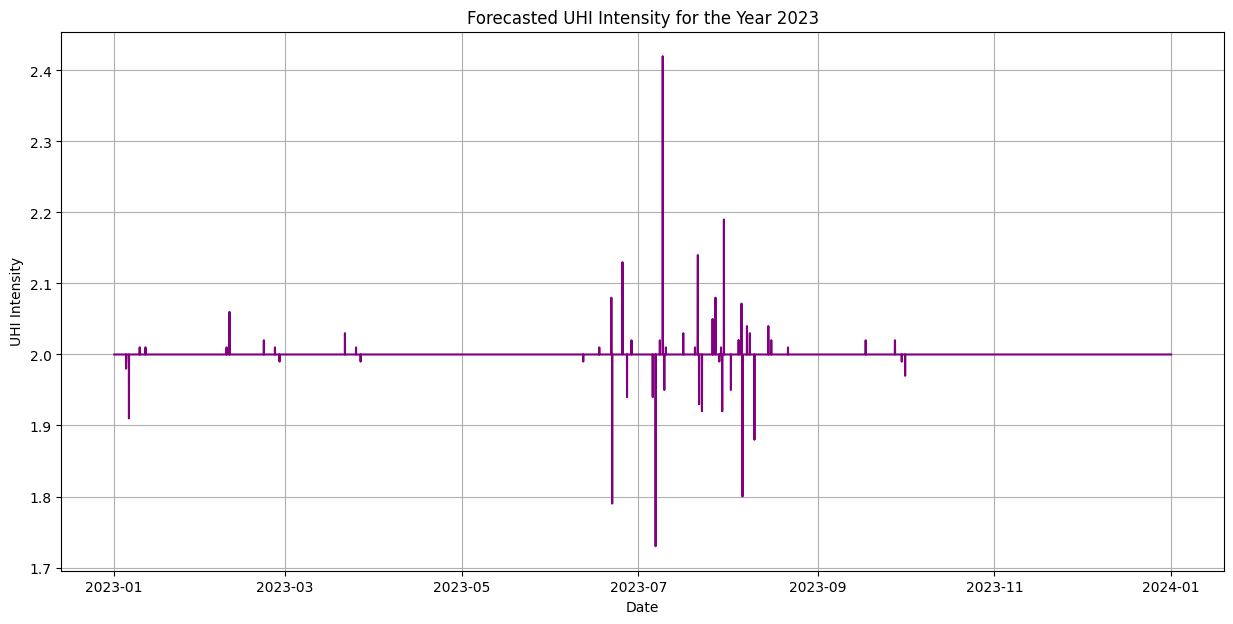

In [53]:
# Feature Engineering
data_relevant['hour'] = data_relevant.index.hour
data_relevant['day_of_week'] = data_relevant.index.dayofweek
data_relevant['day_of_month'] = data_relevant.index.day
data_relevant['month'] = data_relevant.index.month
data_relevant['lag_1'] = data_relevant['UHI Intensity Numeric'].shift(24)
data_relevant['rolling_mean_24h'] = data_relevant['UHI Intensity Numeric'].rolling(window=24).mean()
data_relevant.dropna(inplace=True)

# Prepare data for model
X = data_relevant.drop('UHI Intensity Numeric', axis=1)
y = data_relevant['UHI Intensity Numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Forecast for the year 2023
future_periods = 365 * 24  # Assuming hourly data
last_date_in_data = data['DATE'].max()
print("Last Date ", last_date_in_data)
future_dates = pd.date_range(start=last_date_in_data + pd.DateOffset(hours=1), periods=future_periods, freq='H')

# Make sure the last date in the future dates is correct
print("Last Date in Future Dates ", future_dates[-1])

future_data = pd.DataFrame(index=future_dates)
future_data['hour'] = future_data.index.hour
future_data['day_of_week'] = future_data.index.dayofweek
future_data['day_of_month'] = future_data.index.day
future_data['month'] = future_data.index.month
future_data['lag_1'] = data_relevant['UHI Intensity Numeric'][-1]
future_data['rolling_mean_24h'] = data_relevant['UHI Intensity Numeric'][-24:].mean()
corrected_future_data = future_data[X_train.columns]
predictions = rf_model.predict(corrected_future_data)

# Creating a DataFrame for the forecasted data
forecast_start_date = future_dates[0]
forecast_end_date = future_dates[-1]

forecasted_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='H')

forecasted_data = pd.DataFrame({'Forecast Date': forecasted_dates, 'Predicted UHI Intensity': predictions})
forecasted_data.set_index('Forecast Date', inplace=True)

# Plotting the forecast for the year 2023
plt.figure(figsize=(15, 7))
plt.plot(forecasted_data.index, forecasted_data['Predicted UHI Intensity'], color='purple')
plt.title('Forecasted UHI Intensity for the Year 2023')
plt.xlabel('Date')
plt.ylabel('UHI Intensity')
plt.grid(True)
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# If you want to print the accuracy in percentage (optional)
accuracy_percentage = rf_model.score(X_test, y_test) * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Mean Squared Error (MSE): 0.008995981109937955
R-squared (R2): 0.7844277883499733
Accuracy: 78.44%
